## Porównanie wydajność Pobierania i wysyłania dla HTTP

Statystyki HTTP:
                     Średnia prędkość (MB/s)  Maksymalna prędkość (MB/s)  \
Download (HTTP GET)                33.312290                  118.609690   
Upload (HTTP POST)                 14.142228                  125.220794   

                     Średni czas pobierania (s)  Średni czas wysyłania (s)  
Download (HTTP GET)                    9.999069                        NaN  
Upload (HTTP POST)                          NaN                   9.951293  


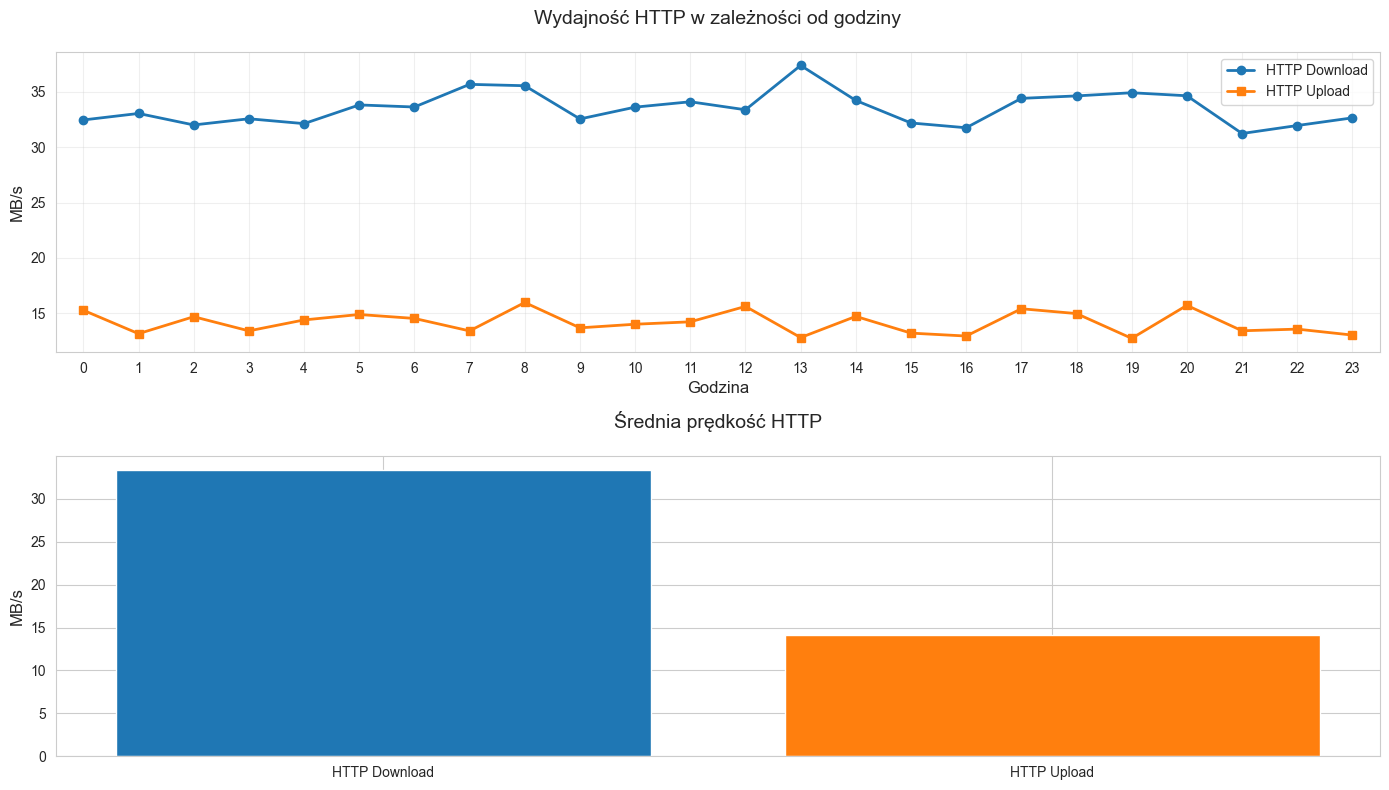

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytaj dane HTTP
httpget = pd.read_csv("data/curr_httpgetmt.csv", parse_dates=["dtime"])
httppost = pd.read_csv("data/curr_httppostmt.csv", parse_dates=["dtime"])

# Oblicz metryki dla HTTP
http_metrics = {
    "Download (HTTP GET)": {
        "Średnia prędkość (MB/s)": httpget["bytes_sec"].mean() / 1e6,
        "Maksymalna prędkość (MB/s)": httpget["bytes_sec"].max() / 1e6,
        "Średni czas pobierania (s)": httpget["fetch_time"].mean() / 1e6,
    },
    "Upload (HTTP POST)": {
        "Średnia prędkość (MB/s)": httppost["bytes_sec"].mean() / 1e6,
        "Maksymalna prędkość (MB/s)": httppost["bytes_sec"].max() / 1e6,
        "Średni czas wysyłania (s)": httppost["fetch_time"].mean() / 1e6,
    }
}

print("Statystyki HTTP:")
print(pd.DataFrame(http_metrics).T)

# Stylowanie wykresów
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# ----------------------------------------------------------
# WYKRES 1: Prędkość HTTP w zależności od godziny (Download vs Upload)
# ----------------------------------------------------------
# Grupowanie po godzinie dla HTTP GET
httpget["hour"] = httpget["dtime"].dt.hour
hourly_httpget = httpget.groupby("hour").agg({"bytes_sec": "mean"}).reset_index()
hourly_httpget["MB/s"] = hourly_httpget["bytes_sec"] / 1e6

# Grupowanie po godzinie dla HTTP POST
httppost["hour"] = httppost["dtime"].dt.hour
hourly_httppost = httppost.groupby("hour").agg({"bytes_sec": "mean"}).reset_index()
hourly_httppost["MB/s"] = hourly_httppost["bytes_sec"] / 1e6

# Tworzenie wykresu
plt.subplot(2, 1, 1)
plt.plot(hourly_httpget["hour"], hourly_httpget["MB/s"], 
         label="HTTP Download", marker="o", color="#1f77b4", linewidth=2)
plt.plot(hourly_httppost["hour"], hourly_httppost["MB/s"], 
         label="HTTP Upload", marker="s", color="#ff7f0e", linewidth=2)

plt.title("Wydajność HTTP w zależności od godziny", fontsize=14, pad=20)
plt.xlabel("Godzina", fontsize=12)
plt.ylabel("MB/s", fontsize=12)
plt.xticks(range(0, 24))
plt.xlim(-0.5, 23.5)
plt.legend()
plt.grid(True, alpha=0.3)

# ----------------------------------------------------------
# WYKRES 2: Porównanie pobierania i wysyłania (HTTP)
# ----------------------------------------------------------
plt.subplot(2, 1, 2)
plt.bar(["HTTP Download", "HTTP Upload"], 
        [http_metrics["Download (HTTP GET)"]["Średnia prędkość (MB/s)"], 
        http_metrics["Upload (HTTP POST)"]["Średnia prędkość (MB/s)"]], 
        color=["#1f77b4", "#ff7f0e"])

plt.title("Średnia prędkość HTTP", fontsize=14, pad=20)
plt.ylabel("MB/s", fontsize=12)

plt.tight_layout()
plt.show()